#### Ini akan notebook untuk melihat bagaimana cara kerja linear regression dengan menggunakan numpy dan gradien descent

In [60]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [61]:
import os
print(os.getcwd())

c:\Users\Romi\Documents\project-linear-regression


In [62]:
os.chdir("c:/Users/Romi/Documents/project-linear-regression")

In [63]:
df = pd.read_csv('dataset\Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [64]:
df = df.drop(columns={'Unnamed: 0'})

In [65]:
X_train = np.array(df['YearsExperience'])
y_train = np.array(df['Salary'])

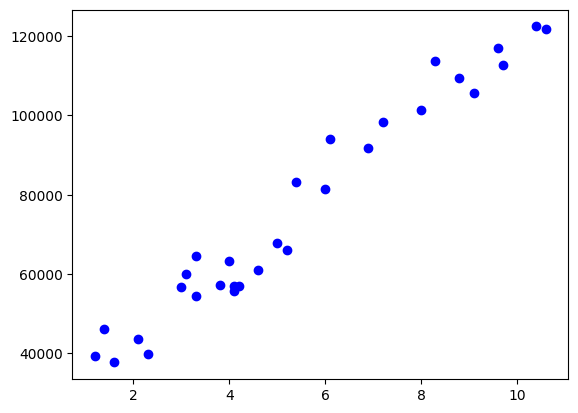

In [66]:
plt.scatter(X_train, y_train, color='blue', label='Data')

In [67]:
# compute the cost 
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) **2
    total_cost = 1/(2*m) * cost
    return total_cost

In [68]:
# compute the gradient (garis miring)
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = f_wb - y[i] * x[i]
    dj_db_i = f_wb - y[i]
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db


In [69]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  j_history = []
  p_history = []
  b = b_in
  w = w_in

  for i in range(num_iters):
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # update parameter dengan learning rate
    b = b - alpha * dj_db
    w = b - alpha * dj_dw

    # save cost j at each iteration
    if i<100000:
      j_history.append(cost_function(x, y, w, b))
      p_history.append([w, b])

    if i% math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
            f"df_dw: {dj_dw:0.3e}, dj_db: {dj_db: 0.3e} ",
            f" w :{w:0.3e}, b:{b:0.5e}")
  return w, b, j_history, p_history

In [70]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-3

w_final, b_final, j_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient_descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 2.98e+09  df_dw: -4.850e+05, dj_db: -7.600e+04   w :5.610e+02, b:7.60040e+01
Iteration 1000: Cost 3.89e+07  df_dw: -4.091e+05, dj_db: -1.220e+02   w :1.190e+04, b:1.14867e+04
Iteration 2000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -2.030e-01   w :1.191e+04, b:1.15057e+04
Iteration 3000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -3.376e-04   w :1.191e+04, b:1.15057e+04
Iteration 4000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -5.614e-07   w :1.191e+04, b:1.15057e+04
Iteration 5000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -9.095e-10   w :1.191e+04, b:1.15057e+04
Iteration 6000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -9.095e-10   w :1.191e+04, b:1.15057e+04
Iteration 7000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -9.095e-10   w :1.191e+04, b:1.15057e+04
Iteration 8000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -9.095e-10   w :1.191e+04, b:1.15057e+04
Iteration 9000: Cost 3.93e+07  df_dw: -4.090e+05, dj_db: -9.095e-10   w :1.191e+04, b:1.15057e+04
(w,b) found by gradi

In [71]:
print(f"prediksi {w_final* 2.3 + b_final:}")

prediksi 38909.53930038761


In [72]:
def compute_model_output(x, w, b):
    m = np.shape(x)[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [73]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [74]:
result = compute_model_output(X_train, w_final, b_final)

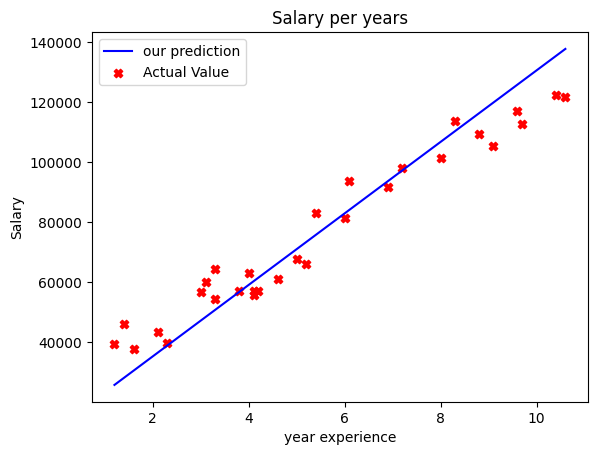

In [75]:
plt.plot(X_train, result, c = 'b', label= 'our prediction')
plt.scatter(X_train, y_train, marker='X', c='r', label='Actual Value')
plt.title('Salary per years')
plt.ylabel("Salary")
plt.xlabel("year experience")
plt.legend()
plt.show()